In [1]:
#pip install yfinance 

In [62]:
# Imports
import panel as pn
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
import matplotlib
import numpy as np
import seaborn as sns 
import yfinance as yf
import plotly.graph_objects as go
import plotly.figure_factory as ff
from MCForecastTools import MCSimulation
import alpaca_trade_api as tradeapi

%matplotlib inline

BTC_Ticker = yf.Ticker("BTC-AUD")
#BTC_Data = BTC_Ticker.history(period="max")
#BTC_Data

ETH_Ticker = yf.Ticker("ETH-AUD")
#ETH_Data = ETH_Ticker.history(period="max")
#ETH_Data

ADA_Ticker = yf.Ticker("ADA-AUD")
#ADA_Data = ADA_Ticker.history(period="max")
#ADA_Data

SOL_Ticker = yf.Ticker("SOL-AUD")
#SOL_Data = SOL_Ticker.history(period="max")
#SOL_Data

XRP_Ticker = yf.Ticker("XRP-AUD")
#XRP_Data = XRP_Ticker.history(period="max")
#XRP_Data

BCH_Ticker = yf.Ticker("BCH-AUD")
#BCH_Data = BCH_Ticker.history(period="max")
#BCH_Data

##Creat crypto DF 
crypto_data = yf.download("BCH-AUD XRP-AUD ADA-AUD SOL-AUD ETH-AUD BTC-AUD", period = "max")
#crypto_data = crypto_data.set_index("Date")

crypto_data.head(-10)


[*********************100%***********************]  6 of 6 completed


Adj Close                                                     \
             ADA-AUD     BCH-AUD       BTC-AUD      ETH-AUD     SOL-AUD   
Date                                                                      
2014-09-17       NaN         NaN    510.645386          NaN         NaN   
2014-09-18       NaN         NaN    472.650330          NaN         NaN   
2014-09-19       NaN         NaN    442.249359          NaN         NaN   
2014-09-20       NaN         NaN    458.053101          NaN         NaN   
2014-09-21       NaN         NaN    446.308197          NaN         NaN   
...              ...         ...           ...          ...         ...   
2022-02-05  1.594818  453.936279  58625.449219  4264.723633  161.122513   
2022-02-06  1.616650  459.069214  59906.714844  4318.624023  162.858597   
2022-02-07  1.679724  480.915985  61504.328125  4408.628418  164.639648   
2022-02-08  1.649726  470.618103  61747.781250  4370.375000  158.987213   
2022-02-09  1.664756  481.857635  61778.222656  4513.606934  158.865707   

                         Close                                         ...  \
             XRP-AUD   ADA-AUD     BCH-AUD       BTC-AUD      ETH-AUD  ...   
Date                                                                   ...   
2014-09-17       NaN       NaN         NaN    510.645386          NaN  ...   
2014-09-18       NaN       NaN         NaN    472.650330          NaN  ...   
2014-09-19       NaN       NaN         NaN    442.249359          NaN  ...   
2014-09-20       NaN       NaN         NaN    458.053101          NaN  ...   
2014-09-21       NaN       NaN         NaN    446.308197          NaN  ...   
...              ...       ...         ...           ...          ...  ...   
2022-02-05  0.943762  1.594818  453.936279  58625.449219  4264.723633  ...   
2022-02-06  0.965638  1.616650  459.069214  59906.714844  4318.624023  ...   
2022-02-07  1.161362  1.679724  480.915985  61504.328125  4408.628418  ...   
2022-02-08  1.229112  1.649726  470.618103  61747.781250  4370.375000  ...   
2022-02-09  1.213064  1.664756  481.857635  61778.222656  4513.606934  ...   

                    Open                                           Volume  \
                 BTC-AUD      ETH-AUD     SOL-AUD   XRP-AUD       ADA-AUD   
Date                                                                        
2014-09-17    513.122620          NaN         NaN       NaN           NaN   
2014-09-18    510.116119          NaN         NaN       NaN           NaN   
2014-09-19    472.275055          NaN         NaN       NaN           NaN   
2014-09-20    442.111572          NaN         NaN       NaN           NaN   
2014-09-21    457.135651          NaN         NaN       NaN           NaN   
...                  ...          ...         ...       ...           ...   
2022-02-05  58710.773438  4221.997070  158.733398  0.927782  1.929482e+09   
2022-02-06  58625.386719  4265.164062  161.134567  0.943762  1.287506e+09   
2022-02-07  59898.730469  4318.547363  162.825317  0.965560  2.956256e+09   
2022-02-08  61524.484375  4409.383301  164.715073  1.162145  3.173245e+09   
2022-02-09  61717.351562  4368.378906  158.901215  1.228162  1.726961e+09   

                                                                   \
                 BCH-AUD      BTC-AUD       ETH-AUD       SOL-AUD   
Date                                                                
2014-09-17           NaN     23511389           NaN           NaN   
2014-09-18           NaN     38400000           NaN           NaN   
2014-09-19           NaN     42477540           NaN           NaN   
2014-09-20           NaN     41294500           NaN           NaN   
2014-09-21           NaN     29744964           NaN           NaN   
...                  ...          ...           ...           ...   
2022-02-05  6.702036e+09  27802232996  1.853510e+10  3.306741e+09   
2022-02-06  6.395807e+09  22800389642  1.337056e+10  2.102388e+09   
2022-02-07  6.613896e+09  401

In [4]:
os.getcwd()

'/Users/coenemmenegger/Desktop/Jupyter-Workplace/Group Project A'

In [5]:
#saving df as csv
crypto_data.to_csv("crytpo_df.csv")

In [6]:
#individual crypto df example 
hist_btc = BTC_Ticker.history(period = "max")
btc_df_close = hist_btc["Close"]
btc_df_close

Date
2014-09-17      510.645386
2014-09-18      472.650330
2014-09-19      442.249359
2014-09-20      458.053101
2014-09-21      446.308197
                  ...     
2022-02-15    62358.480469
2022-02-16    61125.097656
2022-02-17    56404.632812
2022-02-18    55800.097656
2022-02-19    55976.007812
Name: Close, Length: 2713, dtype: float64

In [7]:
#creating df to display close for individual crypto 
crypto_data_close = crypto_data.drop(columns = ["Adj Close", "Open", "Volume", "High", "Low"])
crypto_data_close

Close                                                     \
             ADA-AUD     BCH-AUD       BTC-AUD      ETH-AUD     SOL-AUD   
Date                                                                      
2014-09-17       NaN         NaN    510.645386          NaN         NaN   
2014-09-18       NaN         NaN    472.650330          NaN         NaN   
2014-09-19       NaN         NaN    442.249359          NaN         NaN   
2014-09-20       NaN         NaN    458.053101          NaN         NaN   
2014-09-21       NaN         NaN    446.308197          NaN         NaN   
...              ...         ...           ...          ...         ...   
2022-02-15  1.549458  480.023010  62358.480469  4448.489258  146.712509   
2022-02-16  1.508571  466.290771  61125.097656  4348.972656  141.728729   
2022-02-17  1.419082  435.252747  56404.632812  4009.296875  129.971359   
2022-02-18  1.389899  433.479279  55800.097656  3883.089600  125.544319   
2022-02-19  1.396964  435.105713  55976.007812  3928.278076  127.257202   

                      
             XRP-AUD  
Date                  
2014-09-17       NaN  
2014-09-18       NaN  
2014-09-19       NaN  
2014-09-20       NaN  
2014-09-21       NaN  
...              ...  
2022-02-15  1.192371  
2022-02-16  1.166606  
2022-02-17  1.067446  
2022-02-18  1.095470  
2022-02-19  1.101903  

[2713 rows x 6 columns]

In [8]:
#creating df without btc
crypto_data_close_nobtc = crypto_data_close.drop('BTC-AUD', axis = 1, level = 1)
crypto_data_close_nobtc

Close                                               
             ADA-AUD     BCH-AUD      ETH-AUD     SOL-AUD   XRP-AUD
Date                                                               
2014-09-17       NaN         NaN          NaN         NaN       NaN
2014-09-18       NaN         NaN          NaN         NaN       NaN
2014-09-19       NaN         NaN          NaN         NaN       NaN
2014-09-20       NaN         NaN          NaN         NaN       NaN
2014-09-21       NaN         NaN          NaN         NaN       NaN
...              ...         ...          ...         ...       ...
2022-02-15  1.549458  480.023010  4448.489258  146.712509  1.192371
2022-02-16  1.508571  466.290771  4348.972656  141.728729  1.166606
2022-02-17  1.419082  435.252747  4009.296875  129.971359  1.067446
2022-02-18  1.389899  433.479279  3883.089600  125.544319  1.095470
2022-02-19  1.396964  435.105713  3928.278076  127.257202  1.101903

[2713 rows x 5 columns]

In [9]:
#crypto_data_close = crypto_data_close.fillna(0)
#crypto_data_close.head()

In [10]:
#calculating daily returns 
daily_returns_crypto = crypto_data_close.pct_change()
daily_returns_crypto

Close                                                  
             ADA-AUD   BCH-AUD   BTC-AUD   ETH-AUD   SOL-AUD   XRP-AUD
Date                                                                  
2014-09-17       NaN       NaN       NaN       NaN       NaN       NaN
2014-09-18       NaN       NaN -0.074406       NaN       NaN       NaN
2014-09-19       NaN       NaN -0.064320       NaN       NaN       NaN
2014-09-20       NaN       NaN  0.035735       NaN       NaN       NaN
2014-09-21       NaN       NaN -0.025641       NaN       NaN       NaN
...              ...       ...       ...       ...       ...       ...
2022-02-15  0.052170  0.033240  0.044300  0.081522  0.085041  0.060046
2022-02-16 -0.026388 -0.028607 -0.019779 -0.022371 -0.033970 -0.021608
2022-02-17 -0.059320 -0.066564 -0.077226 -0.078105 -0.082957 -0.084999
2022-02-18 -0.020565 -0.004075 -0.010718 -0.031479 -0.034062  0.026253
2022-02-19  0.005083  0.003752  0.003153  0.011637  0.013644  0.005873

[2713 rows x 6 columns]

In [11]:
#daily returns excluding nan values 
daily_returns_crypto_formatted = daily_returns_crypto.dropna().copy()
daily_returns_crypto_formatted

Close                                                  
             ADA-AUD   BCH-AUD   BTC-AUD   ETH-AUD   SOL-AUD   XRP-AUD
Date                                                                  
2020-04-11  0.004186 -0.004451 -0.000934 -0.001240 -0.183202  0.003197
2020-04-12  0.015761  0.018332  0.018552  0.020723  0.138536  0.013227
2020-04-13 -0.030320 -0.059972 -0.027736 -0.039713 -0.127277 -0.022343
2020-04-14 -0.009663 -0.014038 -0.006059  0.002698 -0.153846 -0.018376
2020-04-15 -0.014577 -0.009914 -0.010074 -0.008105 -0.003751 -0.002590
...              ...       ...       ...       ...       ...       ...
2022-02-15  0.052170  0.033240  0.044300  0.081522  0.085041  0.060046
2022-02-16 -0.026388 -0.028607 -0.019779 -0.022371 -0.033970 -0.021608
2022-02-17 -0.059320 -0.066564 -0.077226 -0.078105 -0.082957 -0.084999
2022-02-18 -0.020565 -0.004075 -0.010718 -0.031479 -0.034062  0.026253
2022-02-19  0.005083  0.003752  0.003153  0.011637  0.013644  0.005873

[680 rows x 6 columns]

In [12]:
#checking type 
type(daily_returns_crypto)

pandas.core.frame.DataFrame

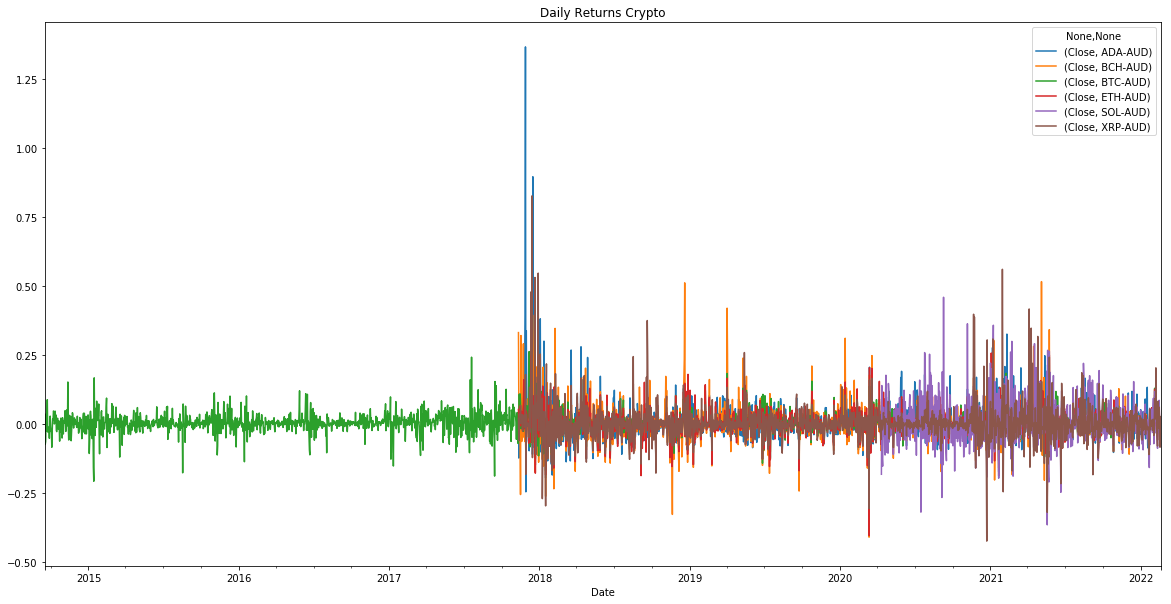

In [13]:
#plotting daily returns 
daily_returns_crypto.plot(figsize = (20,10), title = "Daily Returns Crypto")

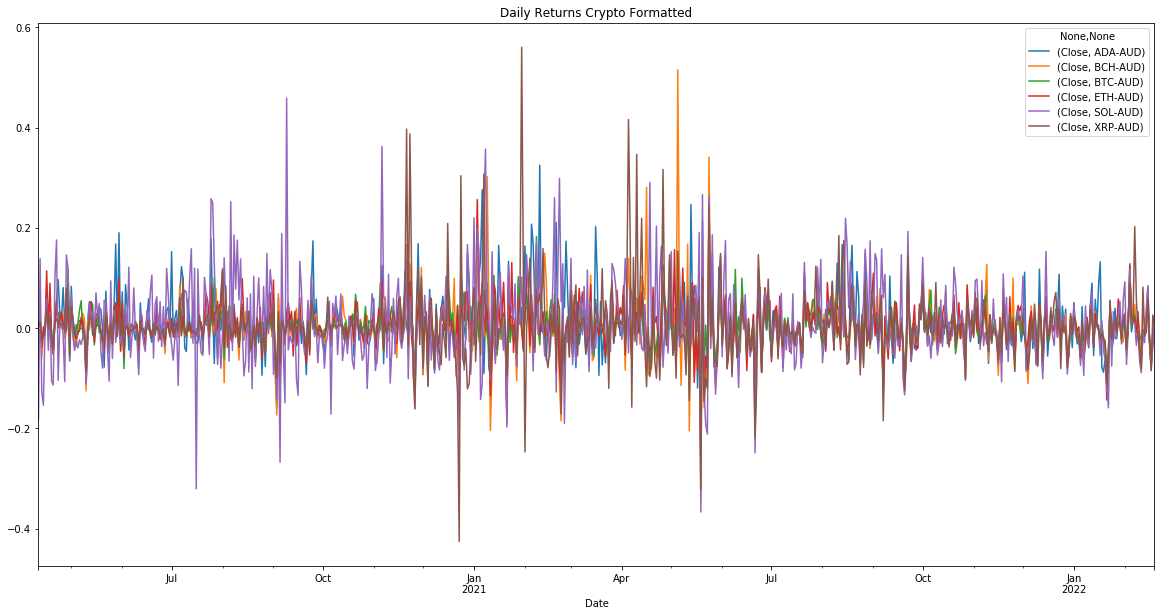

In [14]:
#plotting daily returns 
daily_returns_crypto_formatted.plot(figsize = (20,10), title = "Daily Returns Crypto Formatted")

In [15]:
#checking for nulls 
#daily_returns_crypto.isnull().sum()

In [16]:
#calculating cumulative retrurns
cumulative_returns_crypto = (1 + daily_returns_crypto).cumprod()
cumulative_returns_crypto

Close                                                      
              ADA-AUD   BCH-AUD     BTC-AUD    ETH-AUD    SOL-AUD   XRP-AUD
Date                                                                       
2014-09-17        NaN       NaN         NaN        NaN        NaN       NaN
2014-09-18        NaN       NaN    0.925594        NaN        NaN       NaN
2014-09-19        NaN       NaN    0.866060        NaN        NaN       NaN
2014-09-20        NaN       NaN    0.897008        NaN        NaN       NaN
2014-09-21        NaN       NaN    0.874008        NaN        NaN       NaN
...               ...       ...         ...        ...        ...       ...
2022-02-15  43.771236  0.365037  122.116996  11.388316  97.939320  4.423972
2022-02-16  42.616203  0.354594  119.701655  11.133549  94.612351  4.328378
2022-02-17  40.088195  0.330991  110.457539  10.263965  86.763608  3.960471
2022-02-18  39.263792  0.329643  109.273674   9.940869  83.808295  4.064447
2022-02-19  39.463382  0.330879  109.618160  10.056554  84.951747  4.088315

[2713 rows x 6 columns]

In [17]:
#calculating cumulative retrurns
cumulative_returns_crypto_formatted = (1 + daily_returns_crypto_formatted).cumprod()
cumulative_returns_crypto_formatted

Close                                                    
              ADA-AUD   BCH-AUD   BTC-AUD    ETH-AUD    SOL-AUD   XRP-AUD
Date                                                                     
2020-04-11   1.004186  0.995549  0.999066   0.998760   0.816798  1.003197
2020-04-12   1.020013  1.013800  1.017601   1.019458   0.929954  1.016466
2020-04-13   0.989086  0.953000  0.989377   0.978972   0.811592  0.993755
2020-04-14   0.979529  0.939623  0.983382   0.981614   0.686732  0.975494
2020-04-15   0.965250  0.930307  0.973475   0.973657   0.684156  0.972967
...               ...       ...       ...        ...        ...       ...
2022-02-15  29.616721  1.307471  5.766589  17.828648  97.939320  4.038212
2022-02-16  28.835197  1.270068  5.652532  17.429806  94.612351  3.950954
2022-02-17  27.124683  1.185527  5.216008  16.068454  86.763608  3.615128
2022-02-18  26.566871  1.180697  5.160103  15.562640  83.808295  3.710037
2022-02-19  26.701919  1.185127  5.176371  15.743746  84.951747  3.731824

[680 rows x 6 columns]

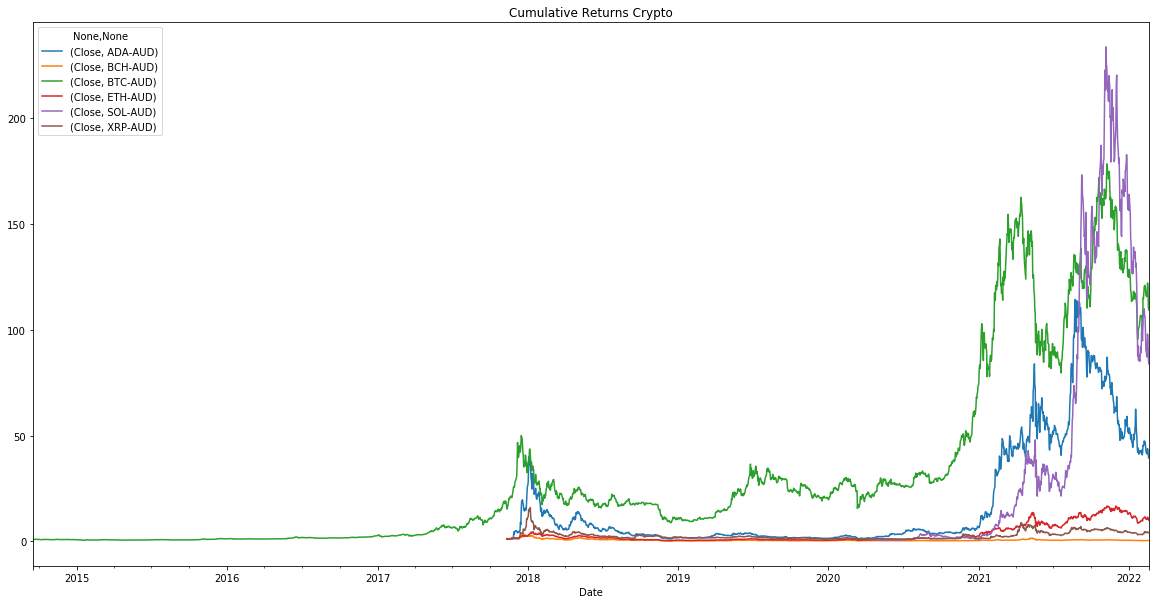

In [18]:
#plotting cumulative returns 
cumulative_returns_crypto.plot(figsize = (20,10), title = "Cumulative Returns Crypto")

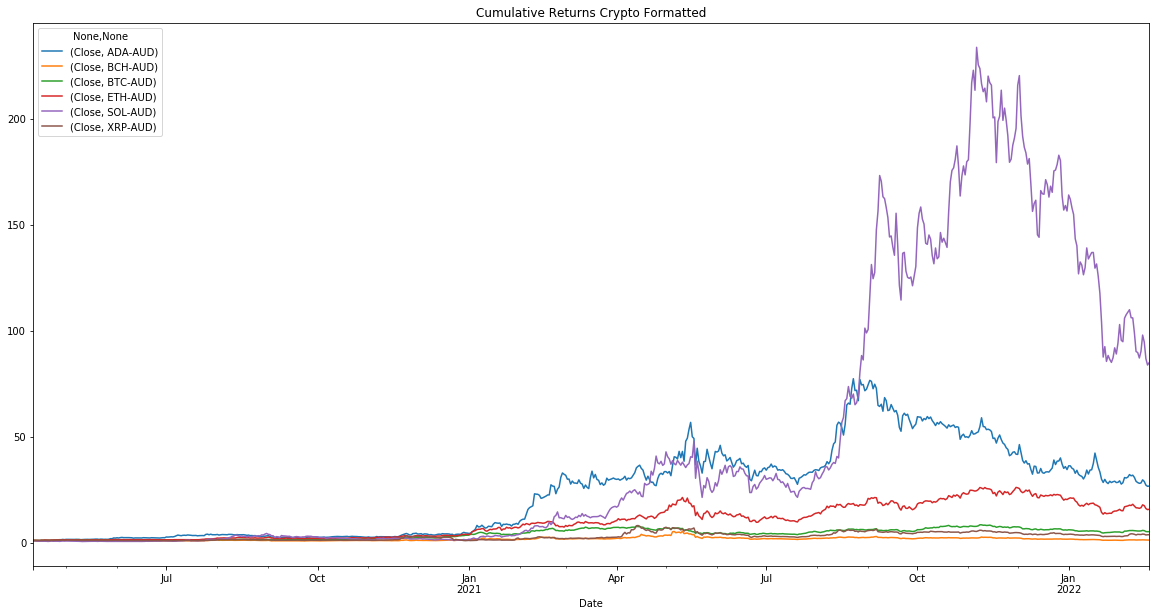

In [19]:
#plotting cumulative returns 
cumulative_returns_crypto_formatted.plot(figsize = (20,10), title = "Cumulative Returns Crypto Formatted")

In [113]:
#calculating the daily standard deviation 
daily_standard_deviation = daily_returns_crypto.std()
daily_standard_deviation

Close  ADA-AUD    0.078342
       BCH-AUD    0.066956
       BTC-AUD    0.038727
       ETH-AUD    0.050976
       SOL-AUD    0.084926
       XRP-AUD    0.069869
dtype: float64

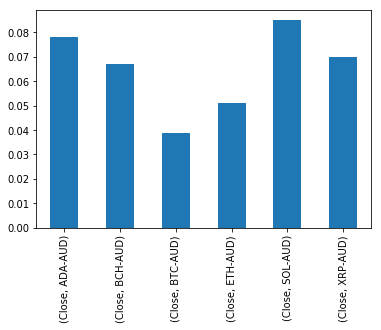

In [21]:
#plotting daily standard deviation 
daily_standard_deviation.plot(kind = "bar")

In [114]:
#annualised standard deviation
annualized_std = daily_returns_crypto.rolling(window = 252).std().mean()
annualized_std

Close  ADA-AUD    0.060122
       BCH-AUD    0.063137
       BTC-AUD    0.037902
       ETH-AUD    0.049859
       SOL-AUD    0.089371
       XRP-AUD    0.059837
dtype: float64

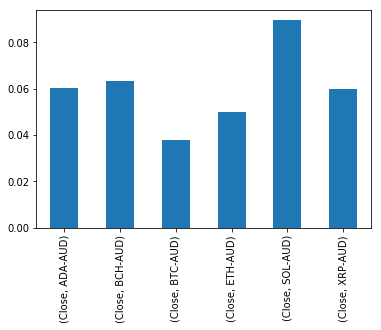

In [115]:
#plotting annualized std
annualized_std.plot(kind = "bar")

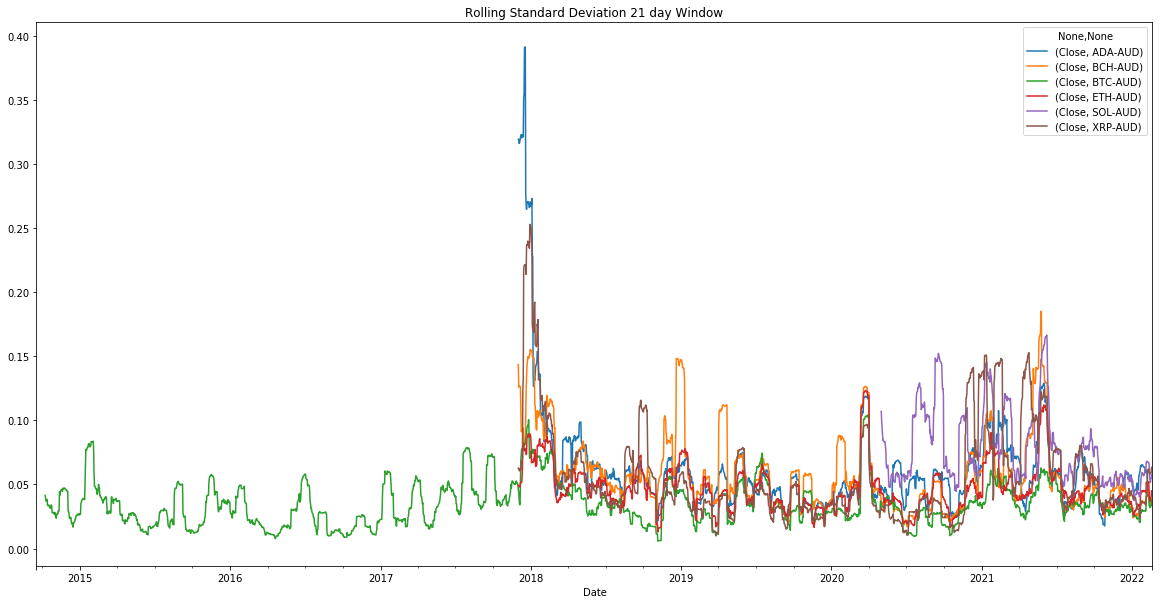

In [23]:
#plotting a 21 day rolling window of the standard deviation 
daily_returns_crypto.rolling(window=21).std().plot(figsize=(20,10),title = "Rolling Standard Deviation 21 day Window")

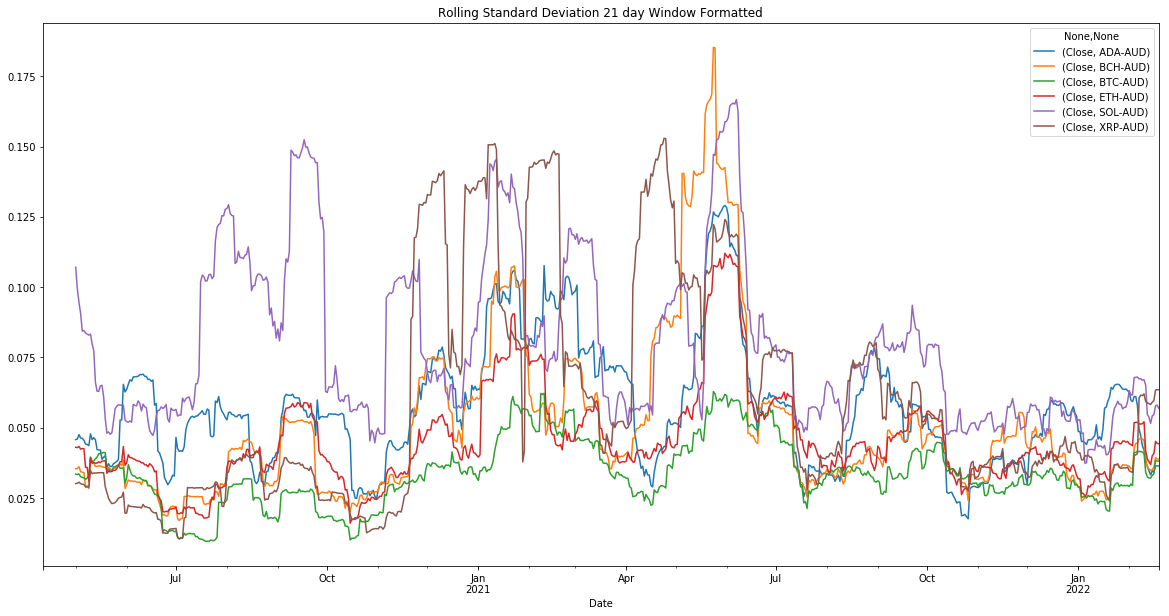

In [24]:
#plotting a 21 day rolling window of the standard deviation 
daily_returns_crypto_formatted.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviation 21 day Window Formatted")

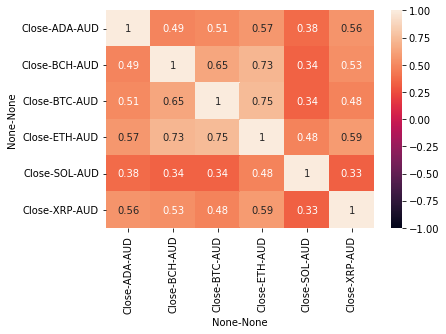

In [25]:
# Calculate the correlation using 'pearson' method
correlation_pearson = daily_returns_crypto.corr(method='pearson')

# Display the correlation matrix
sns.heatmap(correlation_pearson, vmin=-1, vmax=1, annot=True)

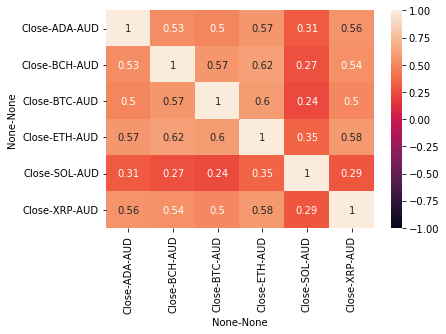

In [26]:
# Calculate the correlation using 'kendall' method
correlation_kendall = daily_returns_crypto.corr(method='kendall')

# Display the correlation matrix
sns.heatmap(correlation_kendall, vmin=-1, vmax=1, annot=True)

In [27]:
# Using `ewm` to calculate the rolling window
crypto_data_close.ewm(com=None, span=None, halflife=21, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0).std().plot

In [28]:
#sharpe ration 
sharperatio = (daily_returns_crypto.mean()*252)/(daily_returns_crypto.std()* np.sqrt(252))
sharperatio

Close  ADA-AUD    1.002643
       BCH-AUD    0.350612
       BTC-AUD    1.020049
       ETH-AUD    0.871298
       SOL-AUD    1.883693
       XRP-AUD    0.716965
dtype: float64

In [29]:
daily_returns_crypto.std()

Close  ADA-AUD    0.078342
       BCH-AUD    0.066956
       BTC-AUD    0.038727
       ETH-AUD    0.050976
       SOL-AUD    0.084926
       XRP-AUD    0.069869
dtype: float64

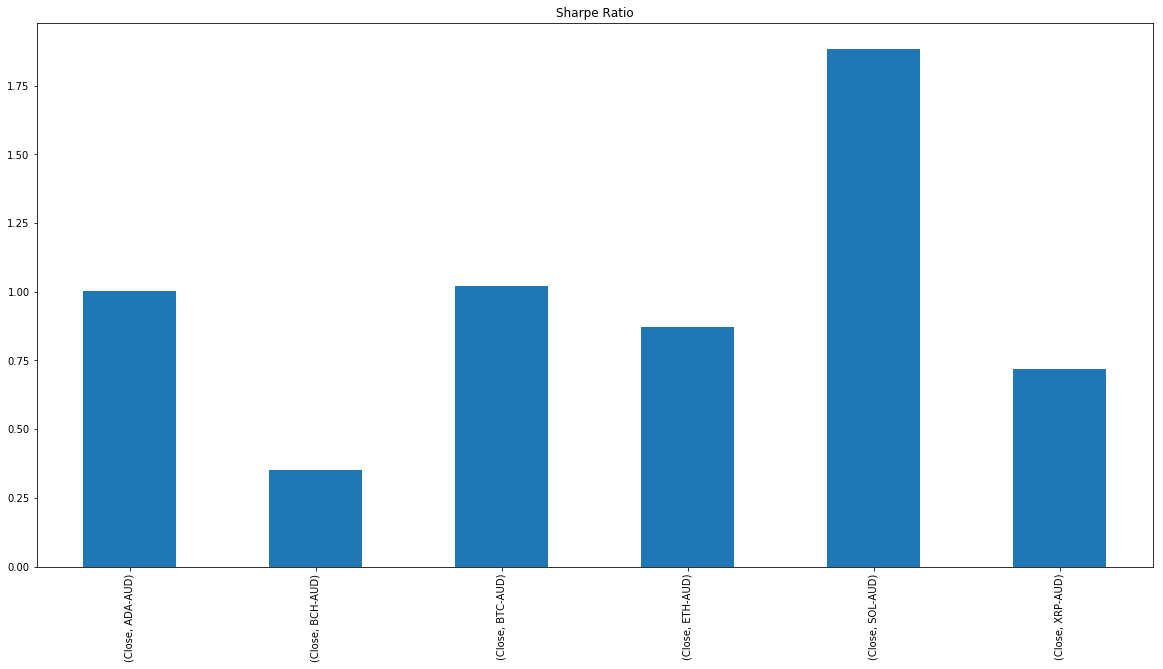

In [30]:
#plotting sharpe ratio
sharperatio.plot(kind = "bar", figsize=(20,10),title="Sharpe Ratio")

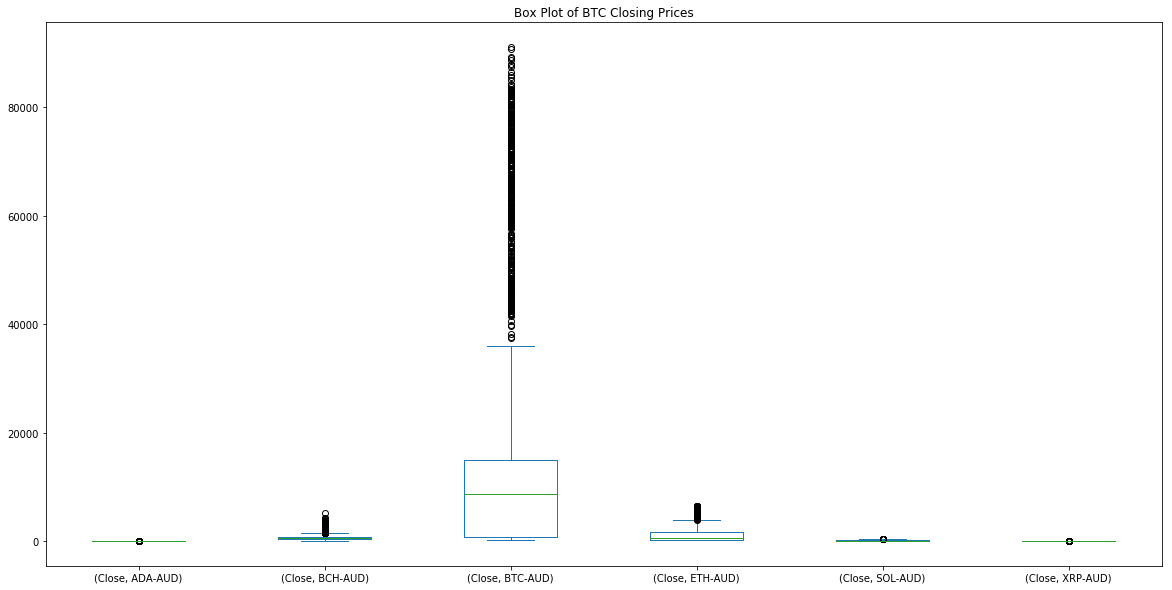

In [37]:
#box plot to visually show risk (btc only)
crypto_data_close.plot(kind = "box", figsize=(20,10),title="Box Plot of BTC Closing Prices")

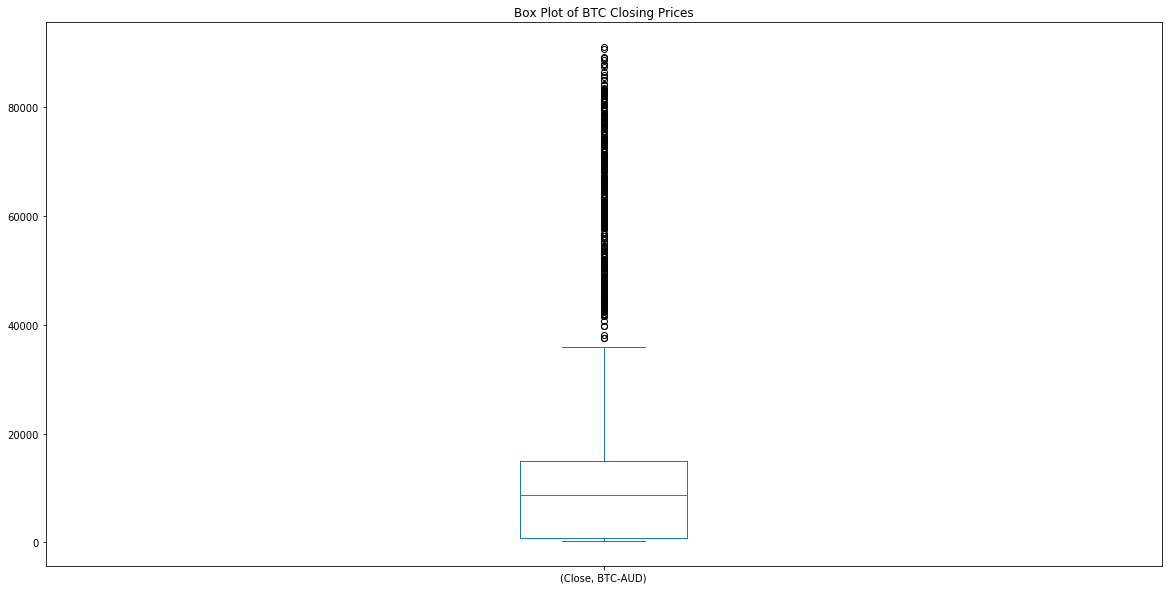

In [35]:
#box plot to visually show risk (btc only)
crypto_data_close["Close", "BTC-AUD"].plot(kind = "box", figsize=(20,10),title="Box Plot of BTC Closing Prices")

/Users/coenemmenegger/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


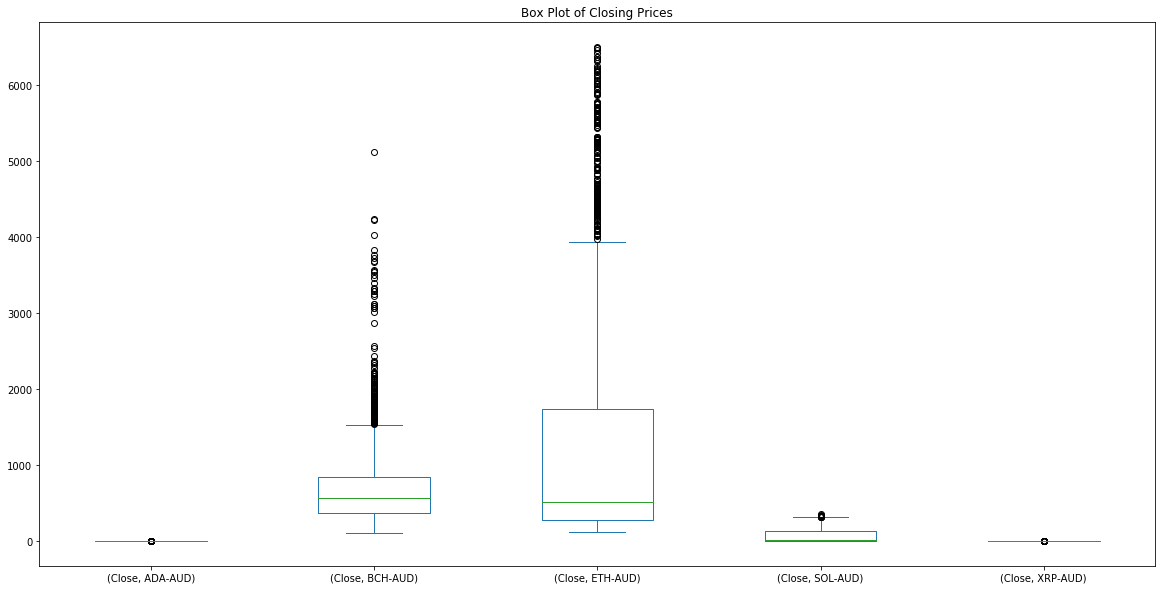

In [36]:
crypto_data_close_nobtc.plot(kind = "box", figsize=(20,10),title="Box Plot of Closing Prices")

In [105]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [65]:
crypto_data_mc = yf.download("BCH-AUD XRP-AUD ADA-AUD SOL-AUD ETH-AUD BTC-AUD",auto_adjust = True, period = "max", group_buy = "ticker")

[*********************100%***********************]  6 of 6 completed


In [92]:
lower_cols = [ i.lower() for i in crypto_data_mc.columns.levels[0]]
#crypto_data_mc.columns.set_levels(lower_cols , level=0)
crypto_data_mc.columns = crypto_data_mc.columns.set_levels(lower_cols,level=0)
(crypto_data_mc.head())

close                                                high  \
           ADA-AUD BCH-AUD     BTC-AUD ETH-AUD SOL-AUD XRP-AUD ADA-AUD   
Date                                                                     
2014-09-17     NaN     NaN  510.645386     NaN     NaN     NaN     NaN   
2014-09-18     NaN     NaN  472.650330     NaN     NaN     NaN     NaN   
2014-09-19     NaN     NaN  442.249359     NaN     NaN     NaN     NaN   
2014-09-20     NaN     NaN  458.053101     NaN     NaN     NaN     NaN   
2014-09-21     NaN     NaN  446.308197     NaN     NaN     NaN     NaN   

                                        ...        open                  \
           BCH-AUD     BTC-AUD ETH-AUD  ...     BTC-AUD ETH-AUD SOL-AUD   
Date                                    ...                               
2014-09-17     NaN  516.007935     NaN  ...  513.122620     NaN     NaN   
2014-09-18     NaN  510.002228     NaN  ...  510.116119     NaN     NaN   
2014-09-19     NaN  477.761017     NaN  ...  472.275055     NaN     NaN   
2014-09-20     NaN  474.174957     NaN  ...  442.111572     NaN     NaN   
2014-09-21     NaN  461.998413     NaN  ...  457.135651     NaN     NaN   

                    volume                                            
           XRP-AUD ADA-AUD BCH-AUD   BTC-AUD ETH-AUD SOL-AUD XRP-AUD  
Date                                                                  
2014-09-17     NaN     NaN     NaN  23511389     NaN     NaN     NaN  
2014-09-18     NaN     NaN     NaN  38400000     NaN     NaN     NaN  
2014-09-19     NaN     NaN     NaN  42477540     NaN     NaN     NaN  
2014-09-20     NaN     NaN     NaN  41294500     NaN     NaN     NaN  
2014-09-21     NaN     NaN     NaN  29744964     NaN     NaN     NaN  

[5 rows x 30 columns]

In [97]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 4 years ago.
start_date = pd.Timestamp("2018-02-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-02-19", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["BCH-AUD", "XRP-AUD", "ADA-AUD", "SOL-AUD", "ETH-AUD", "BTC-AUD"]

# Get 4 year's worth of historical price data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Display sample data
df_ticker.head()

/Users/coenemmenegger/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecatedWarning: get_barset is deprecated as of v1.0.0. Use get_bars instead


Empty DataFrame
Columns: [(ADA-AUD, open), (ADA-AUD, high), (ADA-AUD, low), (ADA-AUD, close), (ADA-AUD, volume), (BCH-AUD, open), (BCH-AUD, high), (BCH-AUD, low), (BCH-AUD, close), (BCH-AUD, volume), (BTC-AUD, open), (BTC-AUD, high), (BTC-AUD, low), (BTC-AUD, close), (BTC-AUD, volume), (ETH-AUD, open), (ETH-AUD, high), (ETH-AUD, low), (ETH-AUD, close), (ETH-AUD, volume), (SOL-AUD, open), (SOL-AUD, high), (SOL-AUD, low), (SOL-AUD, close), (SOL-AUD, volume), (XRP-AUD, open), (XRP-AUD, high), (XRP-AUD, low), (XRP-AUD, close), (XRP-AUD, volume)]
Index: []

[0 rows x 30 columns]

In [50]:
# Configure Monte Carlo simulation to forecast 30 years daily returns 
MC_30_years_crypto = MCSimulation(
    portfolio_data = crypto_data,
    weights = [.15,.15,.15,.15,.20,.20 ],
    num_simulation = 1000,
    num_trading_days = 252*30
)

KeyError: 'close'

In [ ]:
# Execute Monte Carlo simulation to forecast 30 years cumulative returns 
MC_30_years_crypto.calc_cumulative_return()

# Create DataFrame to hold the mean, median, minimum and maximum simulated performance 
simulated_returns_30_years_crypto = {
    "mean": list(simulated_returns_30_years_crypto.simulated_return.mean(axis=1)),
    "median": list(simulated_returns_30_years_crypto.simulated_return.median(axis=1)),
    "min": list(simulated_returns_30_years_crypto.simulated_return.min(axis=1)),
    "max": list(simulated_returns_30_years_crypto.simulated_return.max(axis=1))
}

In [ ]:
# Create a DataFrame with the summary statistics
df_simulated_returns_30_years_crypto = pd.DataFrame(simulated_returns_30_years_crypto)

In [ ]:
# Plot simulated cumulative return trajectory for portfolio over the next 30 years - mean and median forecasts used below. 
df_simulated_returns_30_years_crypto[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of Crypto Portfolio Investments Over Thirty Years")

In [ ]:
# Plot simulation outcomes: line Plot
simulated_returns_30_years_crypto = MC_30_years_US.plot_simulation()

In [ ]:
# Plot simulation outcomes: Probability distribution and confidence intervals
dist_plot_crypto = MC_30_years_crypto.plot_distribution()